In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
! pip install python-louvain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Functions 

In [4]:
def perform_eda(data):
    # Summary statistics
    summary = data.describe()
    
    # Missing values
    missing_values = data.isnull().sum()
    
    # Data types
    data_types = data.dtypes
    
    # Unique values
    unique_values = data.nunique()
    
    
    # Print results
    print("Summary Statistics:\n", summary)
    print("\nMissing Values:\n", missing_values)
    print("\nData Types:\n", data_types)
    print("\nUnique Values:\n", unique_values)
    print("\nShape of data:\n", data.shape)
    
def remove_non_letters(text):
    return re.sub('[^a-zA-Z]', '', text)




# Primary Data Analysis

In [5]:
u_cols = ['user_id', 'location', 'age']
users = pd.read_csv('/content/drive/MyDrive/DS Interview/BX-Users.csv', sep=';',skiprows=1, names=u_cols, encoding='latin-1',low_memory=False)
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
b_cols = ['isbn', 'book_title' ,'book_author','year_of_publication', 'publisher', 'img_s', 'img_m', 'img_l']
books = pd.read_csv('/content/drive/MyDrive/DS Interview/BX-Books.csv', sep=';',skiprows=1, names=b_cols, encoding='latin-1',low_memory=False,on_bad_lines='warn')
books.head()
# 19 books not in data frame

Skipping line 6452: expected 8 fields, saw 9
Skipping line 43667: expected 8 fields, saw 10
Skipping line 51751: expected 8 fields, saw 9
Skipping line 92038: expected 8 fields, saw 9
Skipping line 104319: expected 8 fields, saw 9
Skipping line 121768: expected 8 fields, saw 9
Skipping line 144058: expected 8 fields, saw 9
Skipping line 150789: expected 8 fields, saw 9
Skipping line 157128: expected 8 fields, saw 9
Skipping line 180189: expected 8 fields, saw 9
Skipping line 185738: expected 8 fields, saw 9
Skipping line 209388: expected 8 fields, saw 9
Skipping line 220626: expected 8 fields, saw 9
Skipping line 227933: expected 8 fields, saw 11
Skipping line 228957: expected 8 fields, saw 10
Skipping line 245933: expected 8 fields, saw 9
Skipping line 251296: expected 8 fields, saw 9
Skipping line 259941: expected 8 fields, saw 9
Skipping line 261529: expected 8 fields, saw 9



,isbn,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
r_cols = ['user_id', 'isbn', 'rating']
ratings = pd.read_csv('/content/drive/MyDrive/DS Interview/BX-Book-Ratings.csv',skiprows=1, sep=';', names=r_cols, encoding='latin-1',low_memory=False)
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
print('-'*10)
print( 'Stats for users df \n')
print('-'*10)

perform_eda(users)
print('-'*10)
print( 'Stats for books df')
print('-'*10)


perform_eda(books)
print('-'*10)
print( 'Stats for ratings df')
print('-'*10)

perform_eda(ratings)
print('-'*10)


----------
Stats for users df 

----------
Summary Statistics:
             user_id            age
count  278858.00000  168096.000000
mean   139429.50000      34.751434
std     80499.51502      14.428097
min         1.00000       0.000000
25%     69715.25000      24.000000
50%    139429.50000      32.000000
75%    209143.75000      44.000000
max    278858.00000     244.000000

Missing Values:
 user_id          0
location         0
age         110762
dtype: int64

Data Types:
 user_id       int64
location     object
age         float64
dtype: object

Unique Values:
 user_id     278858
location     57339
age            165
dtype: int64

Shape of data:
 (278858, 3)
----------
Stats for books df
----------
Summary Statistics:
               isbn      book_title      book_author year_of_publication  \
count       271360          271360           271359              271360   
unique      271360          242135           102023                 118   
top     0195153448  Selected Poems  Agatha

# Data Cleanup

In [9]:
users['age'] = users['age'].astype(float)
users['user_id'] = users['user_id'].astype(int)
users['location'] = users['location'].apply(lambda x: x.split(',') if len(x.split(','))==3 else ['n/a', 'n/a', 'n/a'])
users['city'] = users['location'].apply(lambda x: x[0].lower())
users['state'] = users['location'].apply(lambda x: x[1].lower())
users['country'] = users['location'].apply(lambda x: x[2].lower())
users.drop(['location', 'age'], axis = 1, inplace=True)



ratings['user_id'] = ratings['user_id'].astype(int)
ratings['rating'] = ratings['rating'].astype(int)


books['year_of_publication'] = books['year_of_publication'].apply(lambda s: int(s) if s.isdigit() else 2000)
books['book_title_identifier'] = books['book_title'].apply(lambda x: remove_non_letters(x).lower()) + books['book_author'].apply(lambda x: str(x).lower().split(' ')[-1])
print('Orignal book count', books.shape[0])
print('Actual book count', len(books['book_title_identifier'].unique()))
duplicates = books[books.duplicated(subset='book_title_identifier', keep=False)].groupby('book_title_identifier').apply(lambda x: x['isbn'].tolist()).to_dict()
books.drop_duplicates(subset='book_title_identifier', inplace=True)


correction_dict = {}  #{Incorrect ISBN: Correct ISBN}
for li in duplicates.values():
    correct_isbn = li[0]
    for incorrect_isbn in li[1:]:
        correction_dict[incorrect_isbn] = correct_isbn

print('Orignal ratings count', ratings.shape[0])
ratings['isbn'] = ratings['isbn'].map(correction_dict).fillna(ratings['isbn'])
ratings = ratings.groupby(['isbn', 'user_id']).max().reset_index()
print('Actual ratings count', ratings.shape[0])       


Orignal book count 271360
Actual book count 242505
Orignal ratings count 1149780
Actual ratings count 1144516


In [10]:
ratings = ratings[ratings['rating']!=0]

In [11]:
ratings_copy = ratings.copy()

## Clustering Based Recommender System

In [12]:
# Config

threshold_count_for_rating_scaling = 3 # Only scale if user has rated more than this
graph_threshold_rating = 8 # Only considered if score over this rating
user_rating_count_threshold = 10 # Minimum number of ratings a user should have given 
book_rating_count_threshold = 5 # Minimum number of ratings a book should have reviewed
minimum_intersection_set_count = 1 # Minimum count of intersection to make an edge

# Debug
plot = 1

In [13]:
ratings = ratings_copy.copy()
x = ratings.groupby('user_id').count()['rating'] > user_rating_count_threshold
above_threshold_users = x[x].index
ratings = ratings[ratings['user_id'].isin(above_threshold_users)]
y = ratings.groupby('isbn').count()['rating']>= book_rating_count_threshold
relevant_books = y[y].index
ratings = ratings[ratings['isbn'].isin(relevant_books)]

# Scaling 
count_of_ratings = ratings.groupby('user_id').size().to_frame('count')
to_be_scales_id = count_of_ratings[count_of_ratings['count']>threshold_count_for_rating_scaling].index
scale_users_df = ratings[ratings['user_id'].isin(to_be_scales_id)]
scale_users_df = scale_users_df[['user_id', 'rating']].groupby('user_id').max().reset_index().rename(columns={'rating': 'max_rating'})
scale_users_df.set_index('user_id', inplace=True)
ratings = ratings.merge(scale_users_df, on = 'user_id', how='left').sort_values('user_id')
ratings['max_rating'] = ratings['max_rating'].fillna(-1)
ratings['rating'] = (ratings['rating']/ratings['max_rating'])
ratings.drop('max_rating', axis = 1, inplace=True)
ratings['rating'] = ratings['rating'].apply(lambda x: abs(x))
ratings['rating'] = ratings['rating'].apply(lambda x:int(x*10) if x<=1 else int(x))
ratings_graph_df = ratings[ratings['rating']>graph_threshold_rating]

# ISBN replacement 
place_holder_isbn = pd.DataFrame()
place_holder_isbn['isbn'] = list(set(ratings_graph_df['isbn']))
place_holder_isbn_df = ratings_graph_df[['isbn']].drop_duplicates().reset_index().drop('index', axis = 1).reset_index().rename(columns = {'index': 'place_holder_isbn'}).set_index('isbn')
ratings_graph_df = ratings_graph_df.merge(place_holder_isbn_df, on = 'isbn', how='left').sort_values('place_holder_isbn').drop('isbn', axis = 1)

# Edge_list_creation
map_dict = ratings_graph_df[['place_holder_isbn','user_id']].groupby('place_holder_isbn')['user_id'].unique().to_dict()
map_dict = {k:set(v) for k,v in map_dict.items()}
k_li = list(map_dict.keys())
print('Final book count before graph','-'*10, ratings_graph_df['place_holder_isbn'].nunique())
final_edges = []
for itteration, k in enumerate(k_li):
    if itteration%1000 == 0: print ('-'*10 , f"Completed {itteration}/{len(k_li)}")
    for following_k in k_li[itteration+1:]:
        if map_dict[k].intersection(map_dict[following_k])!=set():
            if len(map_dict[k].intersection(map_dict[following_k]))>=minimum_intersection_set_count:
                final_edges.append((k,following_k))

Final book count before graph ---------- 8821
---------- Completed 0/8821
---------- Completed 1000/8821
---------- Completed 2000/8821
---------- Completed 3000/8821
---------- Completed 4000/8821
---------- Completed 5000/8821
---------- Completed 6000/8821
---------- Completed 7000/8821
---------- Completed 8000/8821


In [14]:
import pickle
with open(f'final_edges_gtr-{graph_threshold_rating}_scale-{threshold_count_for_rating_scaling}_user_th-{user_rating_count_threshold}.pickle', 'wb') as file:
    pickle.dump(final_edges, file)

In [15]:
# Load the pickle file
with open(f'final_edges_gtr-{graph_threshold_rating}_scale-{threshold_count_for_rating_scaling}_user_th-{user_rating_count_threshold}.pickle', 'rb') as file:
    final_edges = pickle.load(file)

# Print the loaded data
print(final_edges)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
import networkx as nx
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans

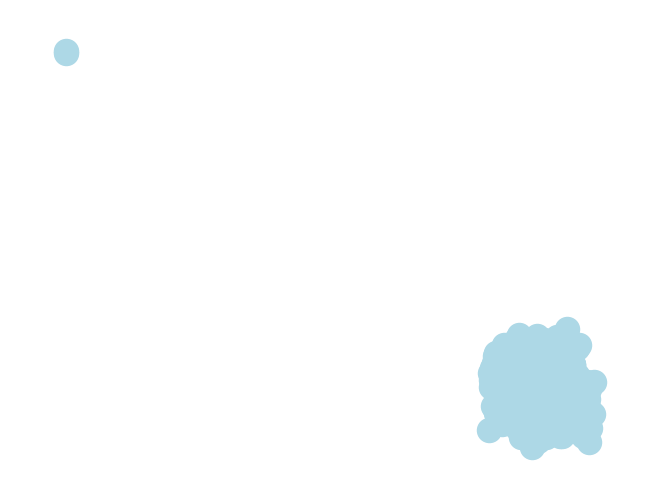

In [17]:
G = nx.Graph() 
G.add_edges_from(final_edges)
if plot == 1:
  # Plot the graph
  nx.draw(G,  node_color='lightblue', edge_color='gray')

  # Display the plot
  plt.show()

## Predefined Clustering 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


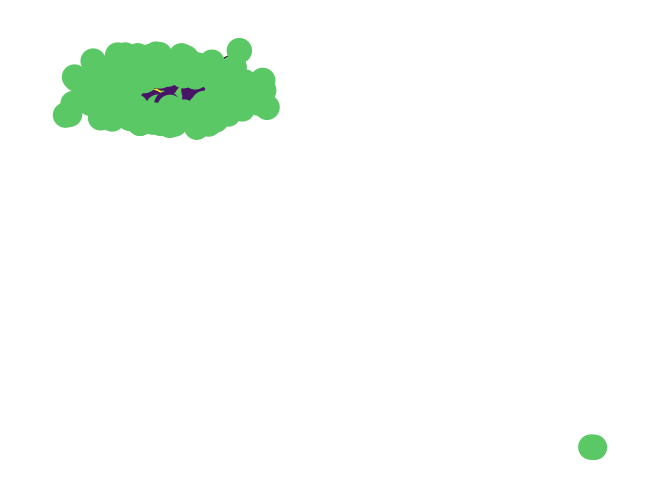

In [18]:


node_features = np.array(list(dict(G.degree()).values())).reshape(-1, 1)

k = 40  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(node_features)
cluster_labels = kmeans.labels_
node_cluster_mapping = {node: label for node, label in zip(G.nodes(), cluster_labels)}


if plot == 1:
  # Step 6: Visualize the clusters
  import matplotlib.pyplot as plt

  pos = nx.spring_layout(G)  # Define the layout for visualization
  nx.draw(G, pos=pos, node_color=cluster_labels, cmap='viridis')
  plt.show()

In [19]:
from collections import Counter
Counter(node_cluster_mapping.values())

Counter({3: 47,
         18: 146,
         30: 725,
         6: 18,
         14: 92,
         10: 39,
         13: 24,
         33: 3,
         23: 243,
         12: 84,
         25: 155,
         0: 326,
         26: 370,
         22: 50,
         19: 167,
         21: 59,
         39: 2,
         27: 22,
         35: 40,
         5: 2,
         16: 608,
         34: 157,
         37: 415,
         31: 133,
         17: 550,
         11: 205,
         24: 87,
         38: 743,
         7: 132,
         15: 152,
         32: 121,
         8: 591,
         4: 144,
         9: 91,
         28: 141,
         20: 12,
         1: 207,
         36: 50,
         2: 759,
         29: 859})

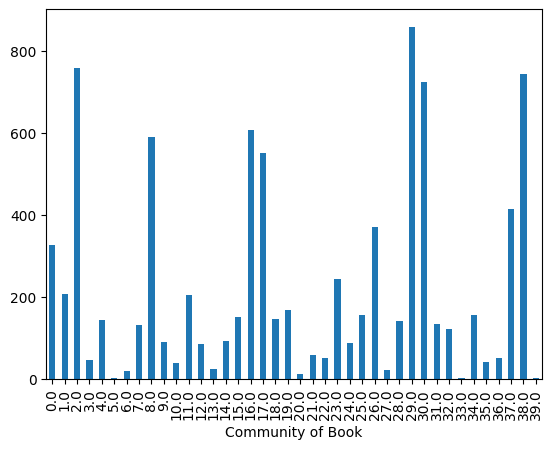

In [20]:
place_holder_isbn_df = place_holder_isbn_df.merge(books[['isbn', 'book_title']].set_index('isbn'), how = 'left',on = 'isbn')
community_df =  pd.DataFrame()
community_df['Community of Book'] = node_cluster_mapping.values()
community_df['place_holder_isbn'] = node_cluster_mapping.keys()
community_df = community_df.set_index('place_holder_isbn')
pd_place_holder_isbn_df = place_holder_isbn_df.merge(community_df, on='place_holder_isbn', how='left')
pd_place_holder_isbn_df.groupby('Community of Book').size().plot.bar()
plt.show()

In [21]:
pd_place_holder_isbn_df

,place_holder_isbn,book_title,Community of Book
0,0,Fahrenheit 451,3.0
1,1,The Martian Chronicles,18.0
2,2,Veronika Deschliesst Zu Sterben / Vernika Deci...,1.0
3,3,Memoirs of a Geisha,24.0
4,4,The Bean Trees,36.0
...,...,...,...
8816,8816,The Gripping Hand,29.0
8817,8817,Bush at War,29.0
8818,8818,A Woman Named Damaris (Women of the West),29.0
8819,8819,Search the Shadows,29.0


## Undefined Clustering

In [22]:
from community import community_louvain
partition = community_louvain.best_partition(G)

In [23]:
print(f'Numbers of books in the graph: {len(partition)}')

print(f'Numbers of communities:{len(set(partition.values()))}')

Numbers of books in the graph: 8771
Numbers of communities:7


<ipython-input-24-1c633014edab>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)


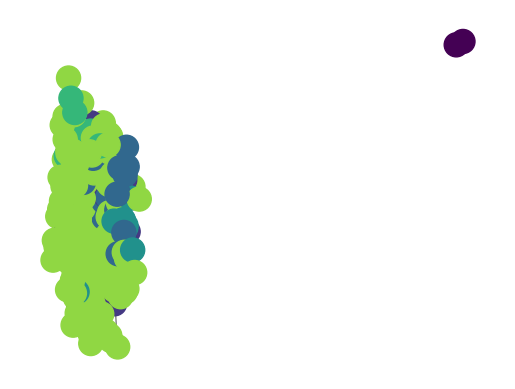

In [24]:
if plot == 1: 
  # Create a layout for the graph
  pos = nx.spring_layout(G)

  # Assign a color to each community
  cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)

  # Draw the nodes with their community colors
  nx.draw_networkx_nodes(G, pos, node_color=list(partition.values()), cmap=cmap)
  nx.draw_networkx_edges(G, pos, alpha=0.5)
  # Show the plot without node labels
  plt.axis('off')

  # Show the plot
  plt.show()

In [25]:
books.shape

(242505, 9)

In [26]:
place_holder_isbn_df = place_holder_isbn_df.merge(books[['isbn', 'book_title']].set_index('isbn'), how = 'left',on = 'isbn')

In [41]:
community_df =  pd.DataFrame()
community_df['Community of Book'] = partition.values()
community_df['place_holder_isbn'] = partition.keys()
community_df = community_df.set_index('place_holder_isbn')
popularity_df = ratings.merge(place_holder_isbn_df, on='isbn', how = 'left').groupby('place_holder_isbn').size().to_frame('popularity')

In [39]:
final_community_df = community_df.merge(popularity_df, on= 'place_holder_isbn').reset_index().merge(place_holder_isbn_df.set_index('place_holder_isbn') , on= 'place_holder_isbn')

In [48]:
final_community_df.rename(columns={'book_title_x':	'book_title'}, inplace = True)

In [55]:
n_com = final_community_df['Community of Book'].nunique()
print(f'Number of communities: {n_com}')

Number of communities: 7


In [49]:
def return_best(book, final_community_df):
  try:
    i = int(final_community_df[final_community_df['book_title'] == book]['Community of Book'])
    r = final_community_df[final_community_df['Community of Book'] == i].sort_values('popularity', ascending = False)['book_title'][:10]        
    return(list(r))
  except:print('Book not in DB')

In [50]:
return_best('The Secret Life of Bees', final_community_df)

['The Lovely Bones: A Novel',
 'The Da Vinci Code',
 'The Secret Life of Bees',
 "Bridget Jones's Diary",
 'Harry Potter and the Chamber of Secrets (Book 2)',
 'Life of Pi',
 'Harry Potter and the Prisoner of Azkaban (Book 3)',
 'Divine Secrets of the Ya-Ya Sisterhood : A Novel',
 'The Red Tent (Bestselling Backlist)',
 'Wild Animus']